In [1]:
# import system libraries
import matplotlib.pyplot as plt### virtual fish swims with 0.12 m  circle without background
import pickle
%matplotlib inline

In [2]:
ReadData = True

"""
Read saved data
"""
if ReadData:
    filename = '../Data/fish/xyz_spatial_distribution'
    infile   = open(filename,'rb')
    new_dict = pickle.load(infile)
    all_xs  = new_dict['xs_rf']
    all_ys = new_dict['ys_rf']
    all_zs = new_dict['zs_rf']
    xs  = new_dict['xs_rf']
    ds = new_dict['ys_rf']
    zs = new_dict['zs_rf']
    
    infile.close()

/home/liang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: 
The get_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.get_clim instead.


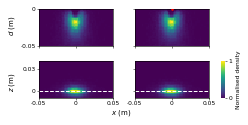

In [4]:
fig,ax = plt.subplots(nrows=2,ncols=2,sharex=True,sharey='row',figsize=(8/2.54,1.55))
plt.setp(ax.flat, aspect=1.0, adjustable='box')

tmpax=ax[0][0].hist2d(all_xs,all_ys,bins=[50,25],rasterized=True,range=[[-0.05,0.05],[-0.05,0]])
tmpax=ax[1][0].hist2d(all_xs,all_zs,bins=[50,25],rasterized=True,range=[[-0.05,0.05],[-0.01,0.04]])
ax[1][0].plot([-0.05,0.05],[0,0],'--',c='1')
ax[0][0].set_yticks([-0.05,0])
ax[0][0].set_yticklabels(['-0.05','0'])
ax[1][0].set_yticks([0,0.03])
ax[1][0].set_yticklabels(['0','0.03'])
ax[1][0].set_xticks([-0.05,0,0.05])
ax[1][0].set_xticklabels(['-0.05','0','0.05'])


tmpax=ax[0][1].hist2d(xs,ds,bins=[50,25],rasterized=True,range=[[-0.05,0.05],[-0.05,0]])
tmpax=ax[1][1].hist2d(xs,zs,bins=[50,25],rasterized=True,range=[[-0.05,0.05],[-0.01,0.04]])
ax[0][1].plot([0],[0],'.',ms=3,color='r',zorder=10)
ax[1][1].plot([-0.05,0.05],[0,0],'--',c='1')
ax[0][1].set_yticks([-0.05,0])
ax[0][1].set_yticklabels(['-0.05','0'])
ax[1][1].set_yticks([0,0.03])
ax[1][1].set_yticklabels(['0','0.03'])
ax[1][1].set_xticks([-0.05,0,0.05])
ax[1][1].set_xticklabels(['-0.05','0','0.05'])


fig.subplots_adjust(bottom=0.1, right=0.9, top=0.9, hspace=0.4)
height = ax[-1][-1].get_position().height
y0 = ax[-1][-1].get_position().p0[1]
cax = fig.add_axes([0.94, y0, 0.02, height])
hbar = fig.colorbar(tmpax[-1],cax=cax,label='Normalised density')
hbar.ax.artists.remove(hbar.outline)
ylim = hbar.get_clim()
hbar.set_ticks(ylim)
hbar.set_ticklabels(['0','1'])


fig.text(0.5,-0.03, r'$x$ (m)', ha="center", va="center",fontsize = 7)
fig.text(0.02,0.75, r'$d$ (m)', ha="center", va="center", rotation=90,fontsize = 7)
fig.text(0.02,0.25, r'$z$ (m)', ha="center", va="center", rotation=90,fontsize = 7)

plt.show()